# Morphological Transformation

### We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.


Reference: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

## Theory
Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs **two inputs**, one is our original image, **second one is called structuring element or kernel** which decides the nature of operation. Two basic morphological operators are 
- Erosion and 
- Dilation. 

Then its variant forms like Opening, Closing, Gradient etc also comes into play. 

We will see them one-by-one with help of following image:

![image](assets/j.png)

## EROSION

- The kernel slides through the image (as in 2D convolution). 
- A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, 
- otherwise it is eroded (made to zero).

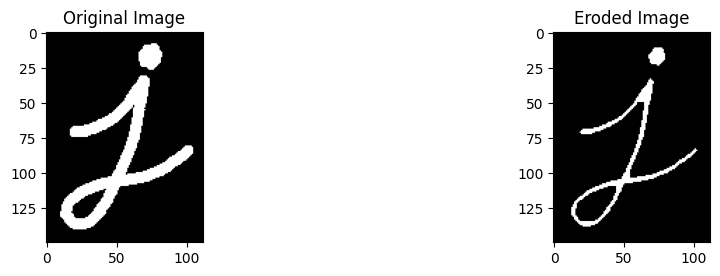

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
img = cv.imread('assets/j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(erosion, cmap='gray'), plt.title('Eroded Image')
plt.show()

## DILATION

- Here, a pixel element is '1' if at least one pixel under the kernel is '1'. 
- So it increases the white region in the image or size of foreground object increases.

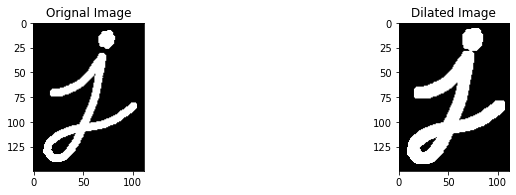

In [2]:
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(dilation, cmap='gray'), plt.title('Dilated Image')
plt.show()

## OPENING

- Errosion Followed by Dilation
- Normally, in cases like noise removal, erosion is followed by dilation. 
- Erosion removes white noises, but it also shrinks our object. 
- So we dilate it. (Meaning we increse the area of foreground image). 
- Since noise is gone, they won't come back, but our object area increases.

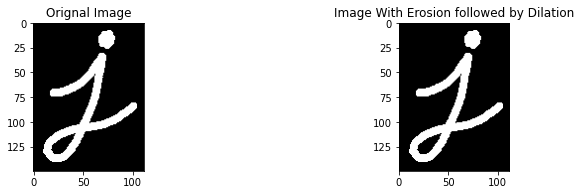

In [3]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(opening, cmap='gray'), plt.title('Image With Erosion followed by Dilation')
plt.show()

## CLOSING

- Closing is reverse of Opening, Dilation followed by Erosion. 
- useful in closing small holes inside the foreground objects, or small black points on the object.

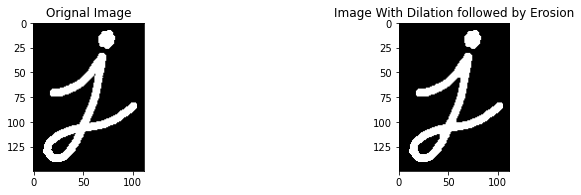

In [4]:
kernel = np.ones((3,3),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(closing, cmap='gray'), plt.title('Image With Dilation followed by Erosion')
plt.show()

## Morphological Gradient

It is the difference between dilation and erosion of an image.

We will get the outline of the object.

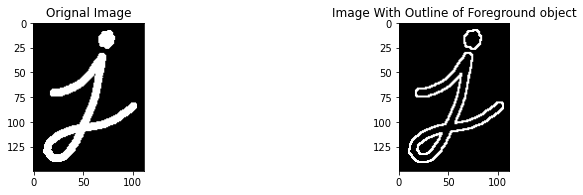

In [5]:
kernel = np.ones((3,3),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(gradient, cmap='gray'), plt.title('Image With Outline of Foreground object')
plt.show()

## Top Hat

It is the difference between input image and Opening of the image.

Lets try with different kernels.

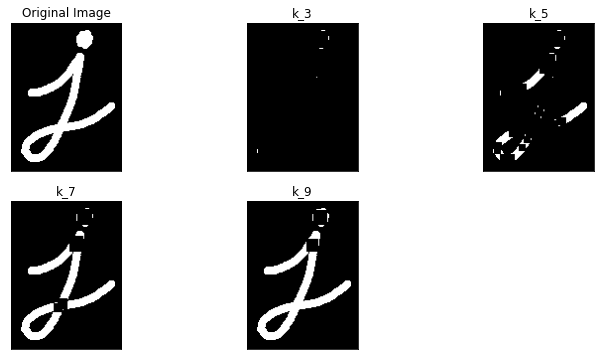

In [6]:
k = [5,7,9,11]
tophat = []
for i in range(len(k)):
    kernel = np.ones((k[i],k[i]),np.uint8)
    tophat.append(cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel))    
    
titles = ['Original Image','k_3', 'k_5', 'k_7', 'k_9']
images = [img] + tophat 

plt.figure(figsize=(12, 6))
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

## Black Hat

It is the difference between the closing of the input image and input image.

Lets try with different kernels.

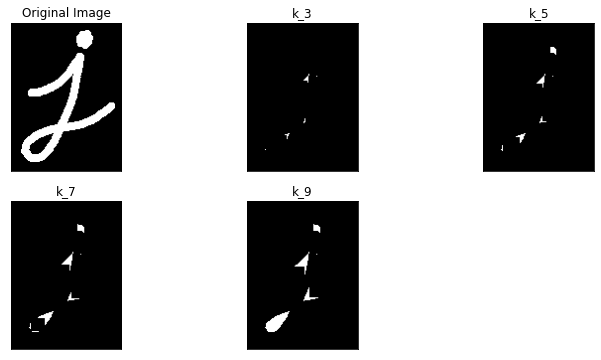

In [7]:
k = [5,7,9,11]
blackhat = []
for i in range(len(k)):
    kernel = np.ones((k[i],k[i]),np.uint8)
    blackhat.append(cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel))    
    
titles = ['Original Image','k_3', 'k_5', 'k_7', 'k_9']
images = [img] + blackhat 

plt.figure(figsize=(12, 6))
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()